#importing the libraries


In [ ]:
import numpy as ap
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

#problem statement

you have been given a dataset that describes the functionality of houses. Now, base on the given features, you have to predict the house price. 

#Defining a DataFrame


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Housing.csv')

#EDA - Exploratory Data Analysis


In [ ]:
# check first five data points from a data set

df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
df.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,2
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,1
544,1750000,3850,3,1,2,1,0,0,0,0,0,0,0


In [ ]:
#check how many rows aare there

df.shape[0]

545

In [ ]:
#check how many columns 

df.shape[1]

13

In [ ]:
#check how many columns

len(df.columns)

13

In [ ]:
#column names

df.columns


Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [ ]:
#what is the data types 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [ ]:
#unique values in each column

df.nunique()

price               219
area                284
bedrooms              6
bathrooms             4
stories               4
mainroad              2
guestroom             2
basement              2
hotwaterheating       2
airconditioning       2
parking               4
prefarea              2
furnishingstatus      3
dtype: int64

In [ ]:
#check number of null value

df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [ ]:
#total number of num value in entire dataset
df.isnull().sum().sum()

0

In [ ]:
#place value of prices stored in column named strength



In [ ]:
#check what are the unique values in mainroad column

df.mainroad.unique()

array(['yes', 'no'], dtype=object)

In [ ]:
df.mainroad.value_counts()

yes    468
no      77
Name: mainroad, dtype: int64

In [ ]:
#change yes-> 1 and no -> 0
#temporary change

newdf = df.copy()

In [ ]:
#Mainroad

df.mainroad.replace(['yes','no'],[1,0], inplace=True)

In [ ]:
df.mainroad.dtypes

dtype('int64')

In [ ]:
#check what are the unique values in column

df.guestroom.unique()

array(['no', 'yes'], dtype=object)

In [ ]:
df.guestroom.value_counts()

no     448
yes     97
Name: guestroom, dtype: int64

In [ ]:
#Guestroom

df.guestroom.replace(['yes','no'],[1,0], inplace=True)


In [ ]:
df.basement.unique()

array(['no', 'yes'], dtype=object)

In [ ]:
df.basement.value_counts()


no     354
yes    191
Name: basement, dtype: int64

In [ ]:
#basement

df.basement.replace(['yes','no'],[1,0], inplace=True)


In [ ]:
#hotwaterheating
df.hotwaterheating.replace(['yes','no'],[1,0], inplace=True)

In [ ]:
#airconditioning
df.airconditioning.replace(['yes','no'],[1,0], inplace=True)

In [ ]:
#prefarea
df.prefarea.replace(['yes','no'],[1,0], inplace=True)

In [ ]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [ ]:
df.furnishingstatus.unique()

array([1, 2, 0])

In [ ]:
df.furnishingstatus.value_counts()

2    227
0    178
1    140
Name: furnishingstatus, dtype: int64

In [ ]:
df.replace(['furnished','unfurnished','semi-furnished'],[1,0,2], inplace=True)

In [ ]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,2
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1


#observations:

1. Data strength - 545
2. Number of random variable - 13
3. none of the columns contains Null Values 
4. columns - price area bedrooms bathrooms stories, parkings has numerical values
5. Columns - other colums has objects values

#Manipulation

1. Changed the categorical values to the numerical values for the columns having object values.

In [ ]:
df.dtypes

price               int64
area                int64
bedrooms            int64
bathrooms           int64
stories             int64
mainroad            int64
guestroom           int64
basement            int64
hotwaterheating     int64
airconditioning     int64
parking             int64
prefarea            int64
furnishingstatus    int64
dtype: object

In [ ]:
#check statistical information

df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [ ]:
#correlation

df.corr()


,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


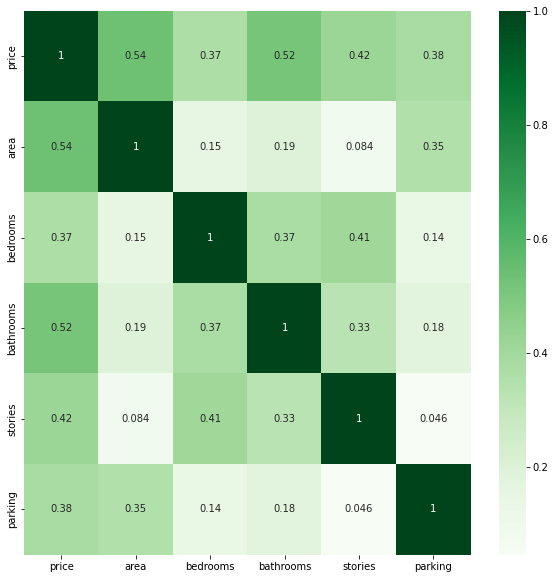

In [ ]:
#heatmap

plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap='Greens')

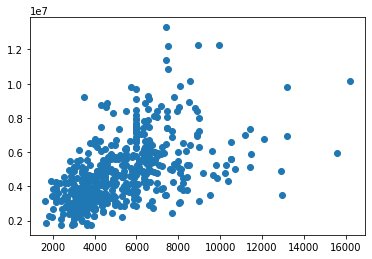

In [ ]:
#plot a graph showing relationship between price and area
#scatter map

plt.scatter(df.area,df.price)

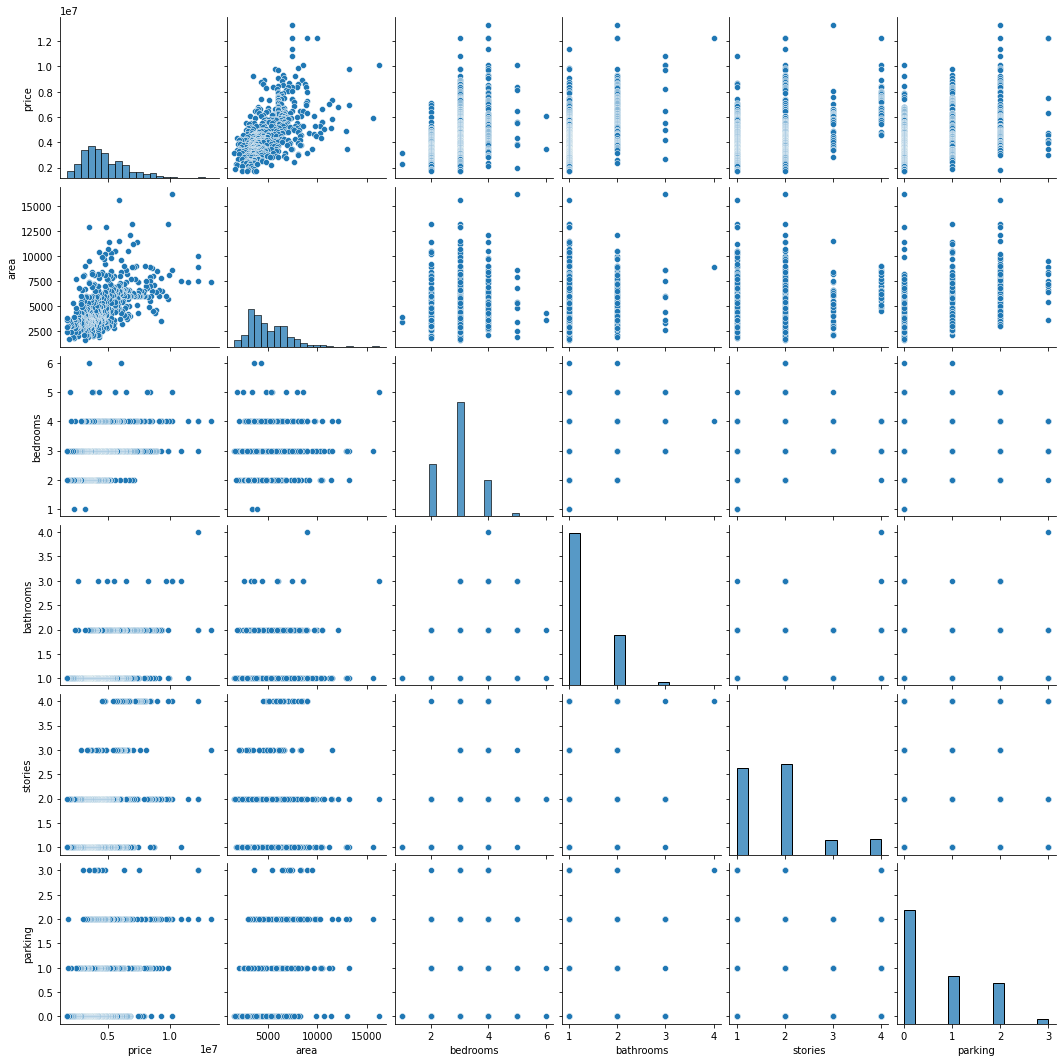

In [ ]:
#pair plot

sns.pairplot(df)

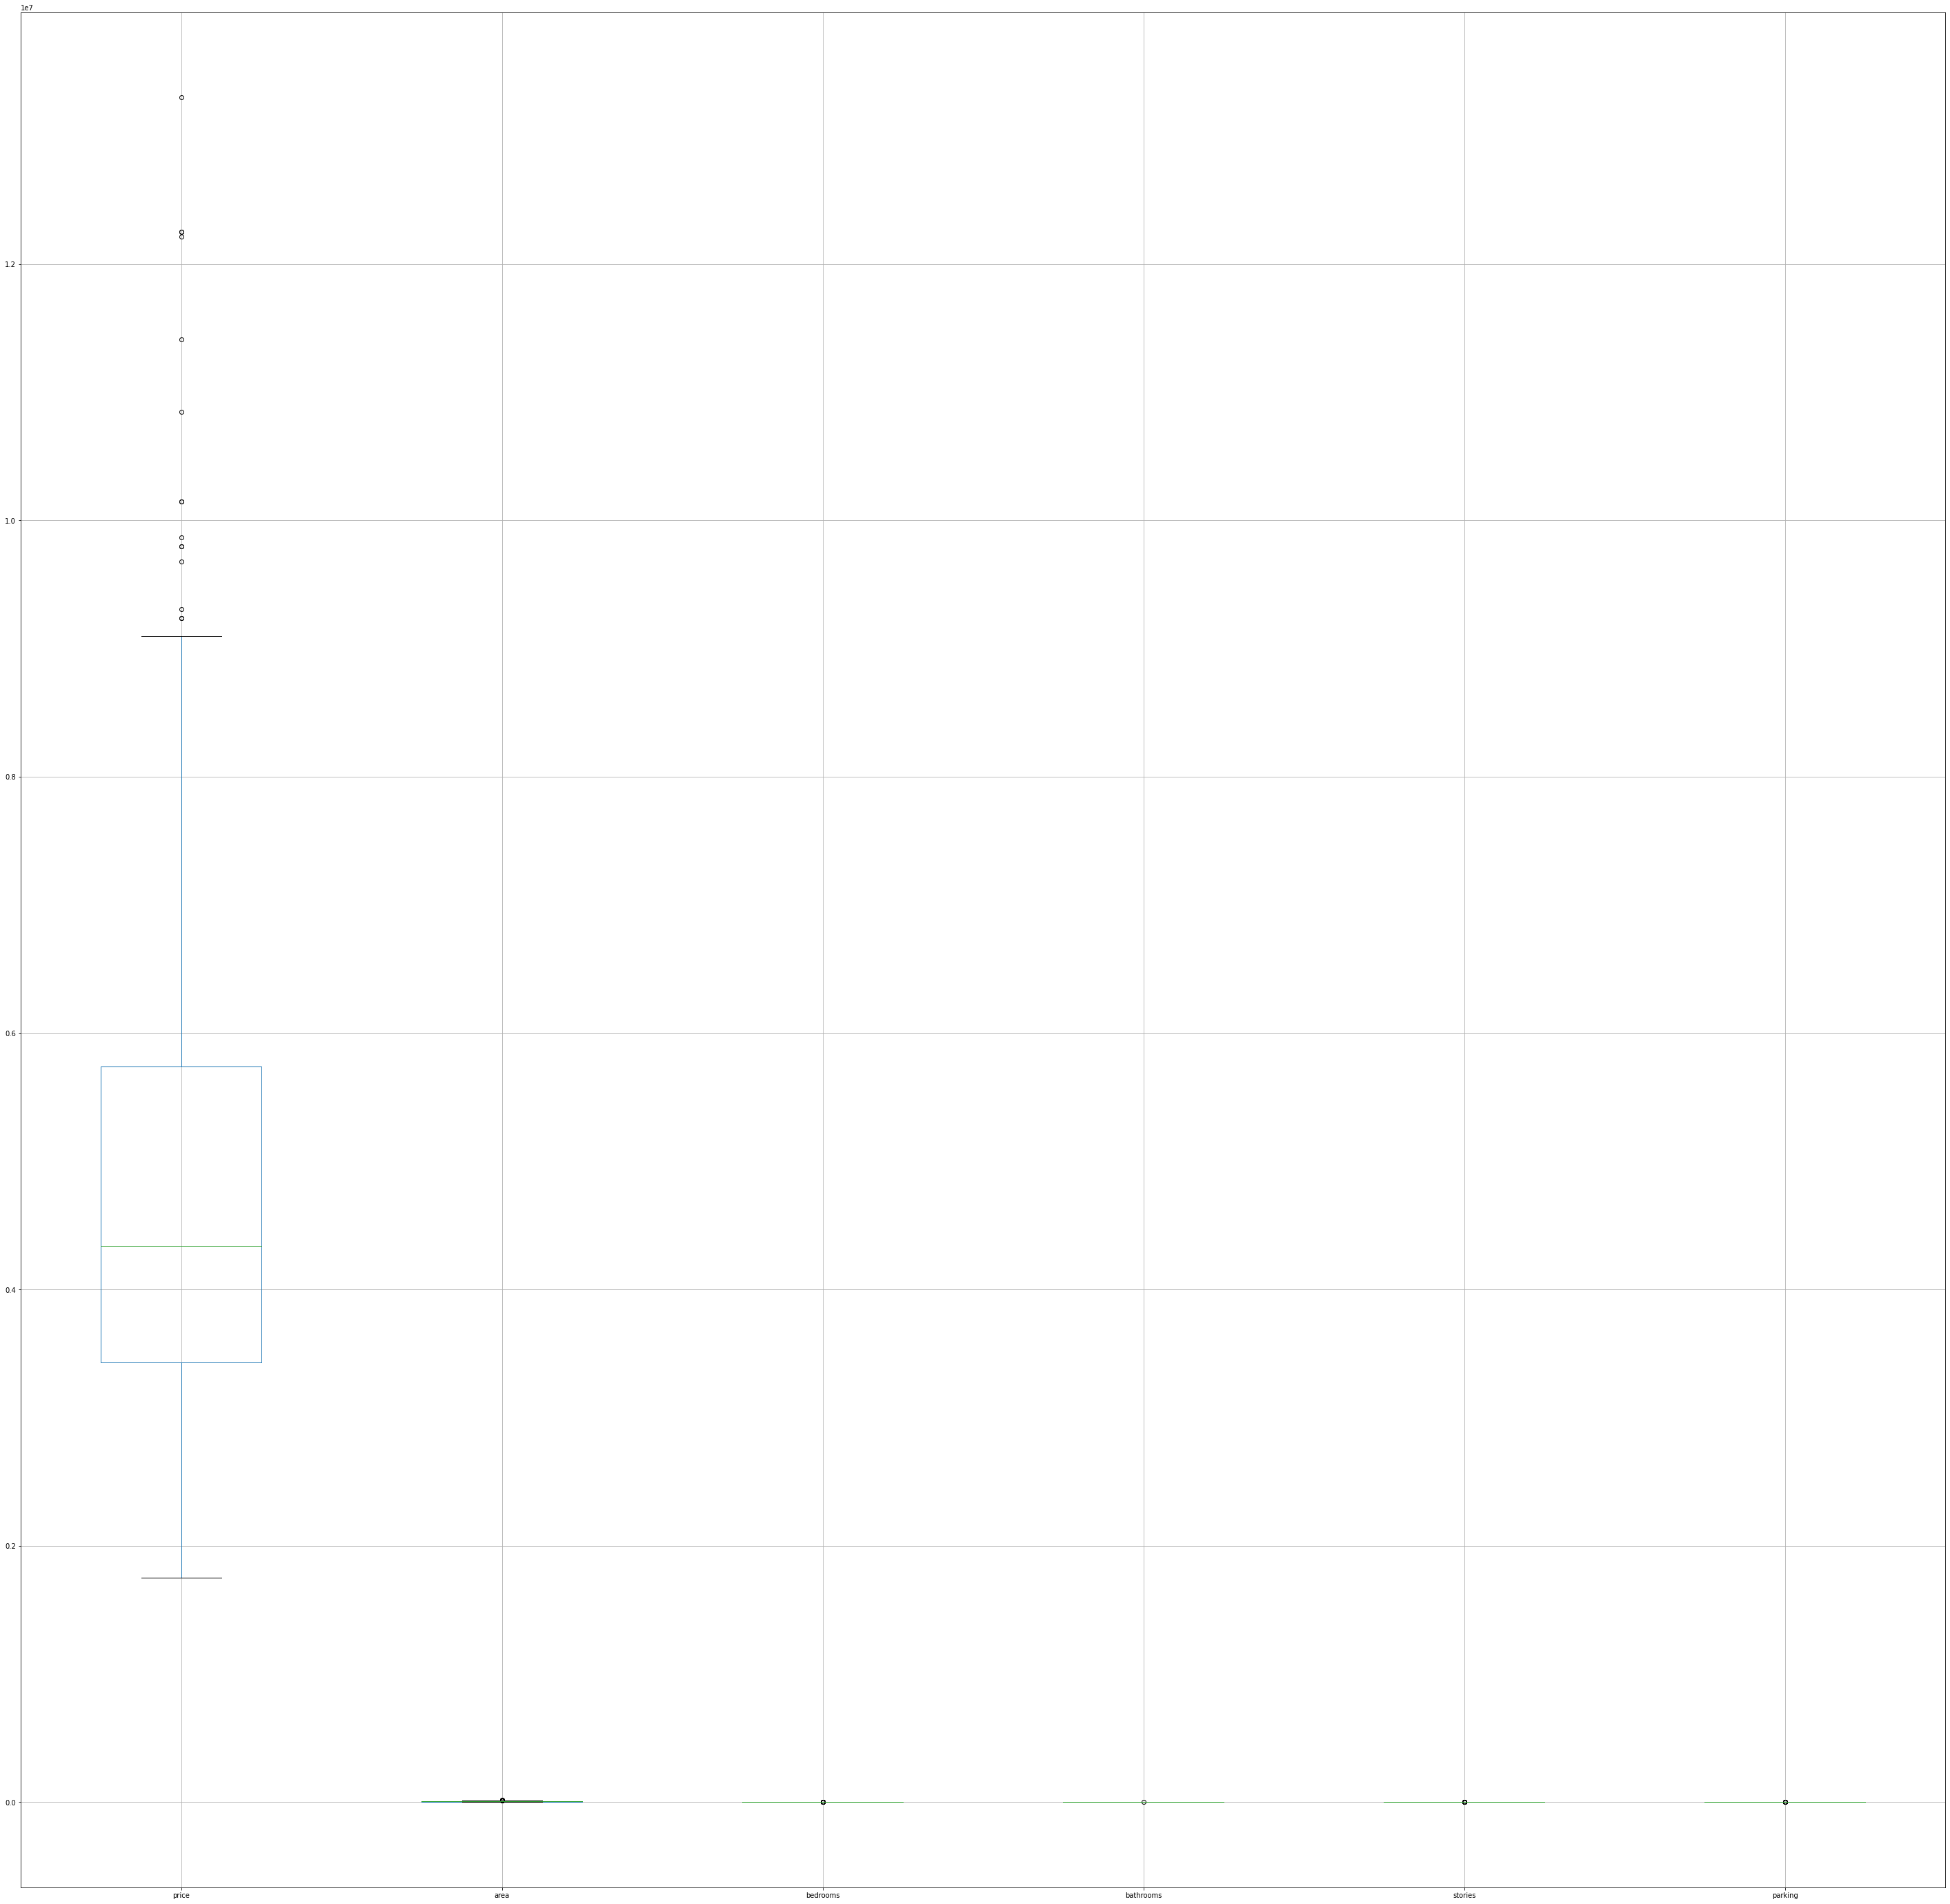

In [ ]:
#plot for outliers
#boxplot

plt.figure(figsize=(50,50))
df.boxplot()

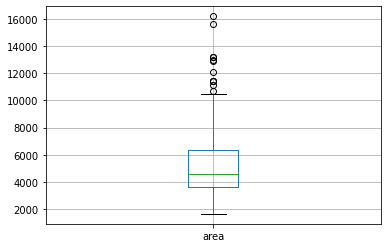

In [ ]:
df[['area']].boxplot()

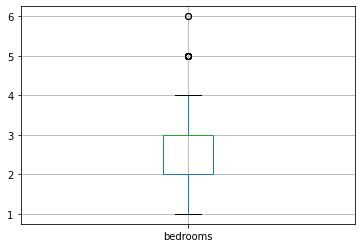

In [ ]:
df[['bedrooms']].boxplot()

In [ ]:
#how many values are there where bedrooms is more than 4

df.bedrooms[df.bedrooms > 4].value_counts().sum()

12

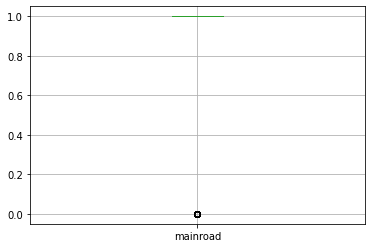

In [ ]:
df[['mainroad']].boxplot()

In [ ]:
len(df.mainroad.loc[df.mainroad == 0])

77

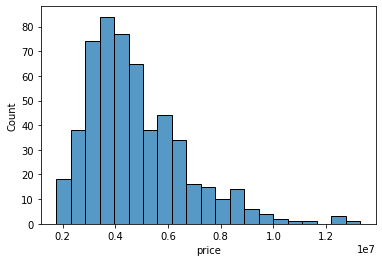

In [ ]:
#histogram of price used for find where is the majority of data lies

sns.histplot(df.price)

In [ ]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,2
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1


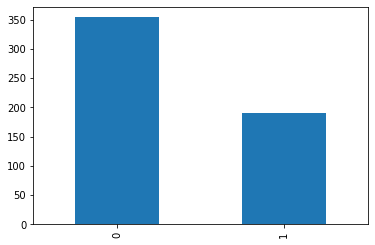

In [ ]:
#bargraph

df.basement.value_counts().plot.bar()

In [ ]:
#what is the price of the house where bedrooms are 4 and bathroom is 2?

df.loc[df.bedrooms == 4,['price', 'bedrooms', 'bathrooms']][df.bathrooms == 2]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


,price,bedrooms,bathrooms
0,13300000,4,2
3,12215000,4,2
12,9310000,4,2
13,9240000,4,2
16,9100000,4,2
25,8540000,4,2
29,8400000,4,2
32,8295000,4,2
37,7980000,4,2
39,7910000,4,2


#Splitting the dataset


In [ ]:
df.head(2)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1


In [ ]:
X = df.drop('price',axis=1)
y = df.price

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
len(X_train)

436

In [ ]:
len(X_test)

109

In [ ]:
len(y_train)

436

In [ ]:
len(y_test)

109

#Choosing the model

In [ ]:
model = LinearRegression()

#Fitting or Training the model

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
 # Intercept Value (cost function)
 model.intercept_

-153020.39767693914

In [ ]:
#Coefficient Value
model.coef_

array([2.37359519e+02, 7.42382082e+04, 1.09878563e+06, 4.22818367e+05,
       3.99602240e+05, 2.36368961e+05, 4.13764911e+05, 6.96228583e+05,
       8.14587673e+05, 2.37846833e+05, 6.34405791e+05, 1.26914419e+05])

#Prediction

In [ ]:
y_test

316    4060000
77     6650000
360    3710000
90     6440000
493    2800000
        ...   
15     9100000
357    3773000
39     7910000
54     7350000
155    5530000
Name: price, Length: 109, dtype: int64

In [ ]:
pred_y = model.predict(X_test)

In [ ]:
pred_y


array([5239173.32762718, 7054067.57583383, 3129423.54574214,
       4668932.93211896, 3057758.57376511, 3585956.42796038,
       5430399.31975463, 6182620.74176088, 2760320.64728725,
       2359083.3399644 , 9746225.66150697, 2850434.59951216,
       3214625.09528042, 3417524.84438337, 3769801.02852143,
       5309671.85335955, 3068028.49401721, 4890310.44714619,
       4453883.75758458, 3594648.20323524, 5899893.81059038,
       5963835.34944124, 2782787.13656036, 4838071.49471231,
       5330250.73959906, 7654298.46783181, 3300237.03688317,
       5001631.29984533, 8012230.93813927, 3178473.5945452 ,
       6578529.7401813 , 3392127.35949438, 6537350.98622346,
       4237680.88295261, 3621348.73870717, 5910621.58319738,
       4896147.52750411, 4471112.88912377, 3231897.01884388,
       4375178.05890928, 4614551.92546614, 3592864.97825681,
       7035078.81430349, 3775390.05875499, 3772667.84258209,
       4365957.52699338, 6850714.81147478, 4080980.87392741,
       3827406.38024767,

In [ ]:
newdf = pd.DataFrame({'Actual Value': y_test, "Predicted Value" :pred_y})

In [ ]:
newdf


,Actual Value,Predicted Value
316,4060000,5.239173e+06
77,6650000,7.054068e+06
360,3710000,3.129424e+06
90,6440000,4.668933e+06
493,2800000,3.057759e+06
...,...,...
15,9100000,5.055402e+06
357,3773000,4.098018e+06
39,7910000,7.162800e+06
54,7350000,6.479294e+06


Text(0.5, 1.0, 'Actual V/s Predicted')

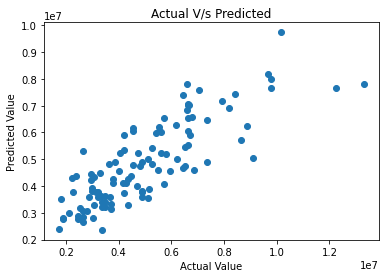

In [ ]:
plt.scatter(newdf['Actual Value'],newdf['Predicted Value'])
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Actual V/s Predicted')

In [ ]:
newdf.corr()

,Actual Value,Predicted Value
Actual Value,1.000000,0.822513
Predicted Value,0.822513,1.000000


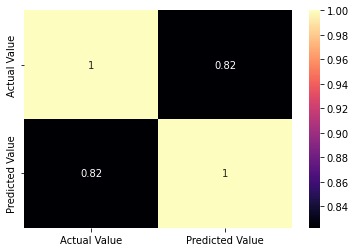

In [ ]:
sns.heatmap(newdf.corr(), annot=True, cmap='magma')

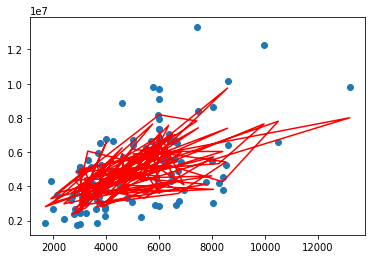

In [ ]:
#Single Linear Regression

plt.scatter(X_test.area,y_test)
plt.plot(X_test.area,pred_y, color='red')

In [ ]:
#a = int(input("Enter the area: "))

In [ ]:
#b = model.predict([a,_______,______,_______])
#print(b)

#Testing the model performance

In [ ]:
r2_score(y_test , pred_y)

0.6542221839581839